In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
import joblib

In [26]:
df = pd.read_csv("anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [27]:
df["genre"] = df["genre"].str.replace(","," ")
df["name"] = df["name"].str.lower().replace(".","")
df["output"] = df[["genre"]].apply(lambda row: " ".join(row.values.astype(str)),axis=1)

In [28]:
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df["output"])
X

<12294x48 sparse matrix of type '<class 'numpy.float64'>'
	with 41700 stored elements in Compressed Sparse Row format>

In [29]:
animes = pd.Series(df.index,index=df["name"])
animes

name
kimi no na wa.                                            0
fullmetal alchemist: brotherhood                          1
gintama°                                                  2
steins;gate                                               3
gintama&#039;                                             4
                                                      ...  
toushindai my lover: minami tai mecha-minami          12289
under world                                           12290
violence gekiga david no hoshi                        12291
violence gekiga shin david no hoshi: inma densetsu    12292
yasuji no pornorama: yacchimae!!                      12293
Length: 12294, dtype: int64

In [30]:
#animes.index = animes.index.str.strip()
index = animes["Fullmetal Alchemist: Brotherhood".lower()]
index

1

In [31]:
question = X[index]
print(question)

  (0, 38)	0.35098726333369934
  (0, 23)	0.5215484702178532
  (0, 20)	0.44963166999178716
  (0, 10)	0.3196092910272099
  (0, 1)	0.3176066463834324
  (0, 0)	0.29464923376142327
  (0, 8)	0.33583365500987794


In [32]:
question.toarray()

array([[0.29464923, 0.31760665, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33583366, 0.        ,
        0.31960929, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.44963167, 0.        , 0.        , 0.52154847, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.35098726, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [33]:
simlity = cosine_similarity(question,X)
simlity

array([[0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
simlity = simlity.flatten()
simlity

array([0.14784981, 1.        , 0.1786367 , ..., 0.        , 0.        ,
       0.        ])

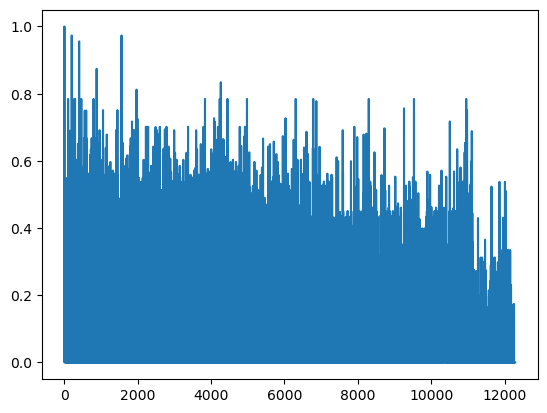

In [35]:
plt.plot(simlity)

In [36]:
(-simlity).argsort()

array([    1,   200,  1558, ...,  3423,  8175, 12293], dtype=int64)

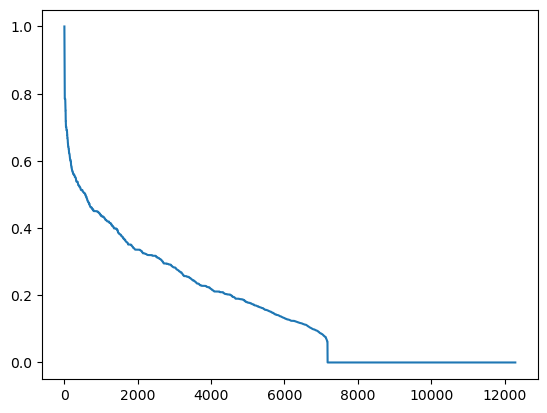

In [37]:
plt.plot(simlity[(-simlity).argsort()])

In [38]:
recomendation = (-simlity).argsort()[1:20]
recomendation

array([  200,  1558,   402,   879,  4264,  1967,  6306,   268,  4978,
        3833,  4445,   795,  4235,   290,  8298,   461,   101, 10953,
        9529], dtype=int64)

In [39]:
df["name"].iloc[recomendation]
print(df["name"].iloc[recomendation])

200                                    fullmetal alchemist
1558         fullmetal alchemist: the sacred star of milos
402              fullmetal alchemist: brotherhood specials
879                    tales of vesperia: the first strike
4264                                        tide-line blue
1967                      fullmetal alchemist: reflections
6306                      chain chronicle: short animation
268                           magi: the labyrinth of magic
4978           densetsu no yuusha no densetsu: iris report
3833                                     log horizon recap
4445     dragon quest: dai no daibouken buchiyabure!! s...
795                         densetsu no yuusha no densetsu
4235     dragon quest: dai no daibouken tachiagare!! ab...
290                            magi: sinbad no bouken (tv)
8298          chain chronicle: haecceitas no hikari part 1
461                                 magi: sinbad no bouken
101                             magi: the kingdom of mag

In [40]:
# Guardar el modelo

joblib.dump(tfidf,"modelo_anime.pkl")

['modelo_anime.pkl']

In [41]:
# cargar el modelo
tfidf = joblib.load("modelo_anime.pkl")